# Regularización Ridge, Lasso y Elastic Net con Python
          Joaquín Amat Rodrigo
          Noviembre, 2020

### Introducción


La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Tres de las limitaciones que aparecen en la práctica al tratar de emplear este tipo de modelos (ajustados por mínimos cuadrados ordinarios) son:

Se ven perjudicados por la incorporación de predictores correlacionados.

No realizan selección de predictores, todos los predictores se incorporan en el modelo aunque no aporten información relevante. Esto suele complicar la interpretación del modelo y reducir su capacidad predictiva.

No pueden ajustarse cuando el número de predictores es superior al número de observaciones.

Una forma de atenuar el impacto de estos problemas es utilizar estrategias de regularización como ridge, Lasso o Elastic Net, que fuerzan a que los coeficientes del modelo tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes.

A lo largo de este documento, se describen de forma progresiva los fundamentos teóricos de la regresión lineal con regularización ridge, Lasso y Elastic Net, los principales aspectos prácticos a tener en cuenta y ejemplos de cómo crear este tipo de modelos en Python y Scikitlearn

## Regresión lineal


El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson) considera que, dado un conjunto de observaciones  {yi,xi1,...,xnp}ni=1
 , la media  μ
  de la variable respuesta  y
  se relaciona de forma lineal con la o las variables regresoras  x1
  ...  xp
  acorde a la ecuación:


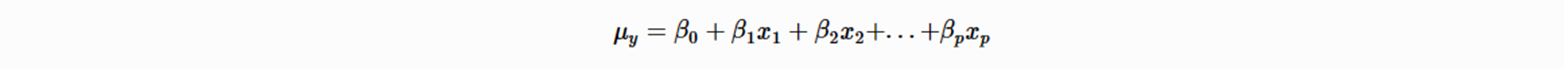

 
El resultado de esta ecuación se conoce como la línea de regresión poblacional, y recoge la relación entre los predictores y la media de la variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de estadística es:


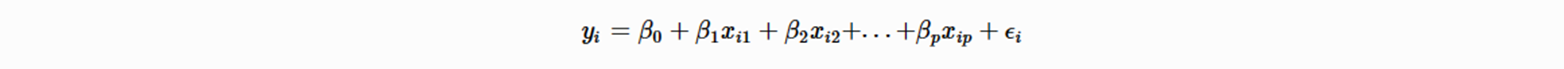
 
En este caso, se está haciendo referencia al valor de  y
  para una observación  i
  concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error  ϵ
 .

En ambos casos, la interpretación de los elementos del modelo es la misma:

β0
 : es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta  y
  cuando todos los predictores son cero.

βj
 : es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora  xj
 , manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

e
 : es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en  y
  pero que no se incluyen en el modelo como predictores.

En la gran mayoría de casos, los valores  β0
  y  βj
  poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones  β^0
  y  β^j
 . Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud (likelihood), es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados. El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

Los coeficientes de regresión del modelo son por lo tanto los que controlan la influencia de cada predictor en el modelo. Sin embargo, la magnitud de cada coeficiente depende de las unidades en las que se midan los predictores, por lo que su magnitud no está asociada con la importancia de cada predictor. Para poder considerar que, cuanto más próximo a cero es el coeficiente un predictor, menor su influencia sobre la variable respuesta en comparación al resto, es necesario estandarizar todos los predictores antes de ajustar el modelo.


## Regularización¶


Las estrategias de regularización incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con el objetivo de evitar overfitting, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

Dado que estos métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores antes de entrenar el modelo.

## Ridge


La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado  (||β||22=∑pj=1β2j)
 . A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. El grado de penalización está controlado por el hiperparámetro  λ
 . Cuando  λ=0
 , la penalización es nula y el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios (OLS). A medida que  λ
  aumenta, mayor es la penalización y menor el valor de los predictores.


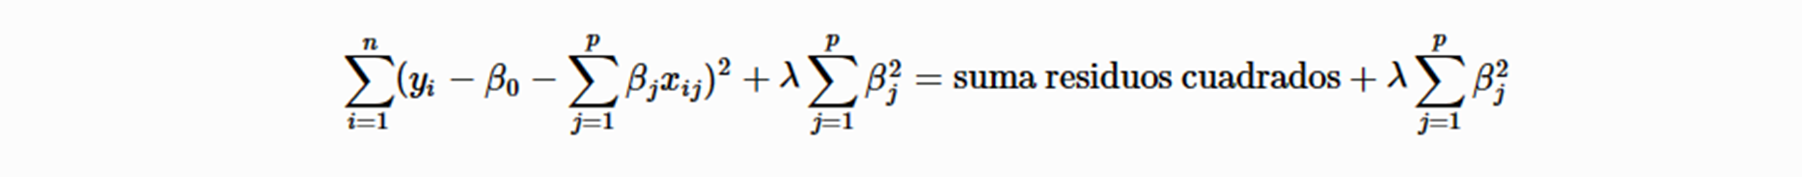
 
La principal ventaja de aplicar ridge frente al ajuste por mínimos cuadrados ordinarios (OLS) es la reducción de varianza. Por lo general, en situaciones en las que la relación entre la variable respuesta y los predictores es aproximadamente lineal, las estimaciones por mínimos cuadrados tienen poco bias pero aún pueden sufrir alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Este problema se acentúa conforme el número de predictores introducido en el modelo se aproxima al número de observaciones de entrenamiento, llegando al punto en que, si  p>n
 , no es posible ajustar el modelo por mínimos cuadrados ordinarios. Empleando un valor adecuado de  λ
 , el método de ridge es capaz de reducir varianza sin apenas aumentar el bias, consiguiendo así un menor error total.

La desventaja del método ridge es que, el modelo final, incluye todos los predictores. Esto es así porque, si bien la penalización fuerza a que los coeficientes tiendan a cero, nunca llegan a ser exactamente cero (solo si  λ=∞
 ). Este método consigue minimizar la influencia sobre el modelo de los predictores menos relacionados con la variable respuesta pero, en el modelo final, van a seguir apareciendo. Aunque esto no supone un problema para la precisión del modelo, sí lo es para su interpretación.


Lasso

## Lasso


La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión  (||β||1=∑pj=1|βj|)
 . A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue excluir los predictores menos relevantes. Al igual que en ridge, el grado de penalización está controlado por el hiperparámetro  λ
 . Cuando  λ=0
 , el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que  λ
  aumenta, mayor es la penalización y más predictores quedan excluidos.
  
  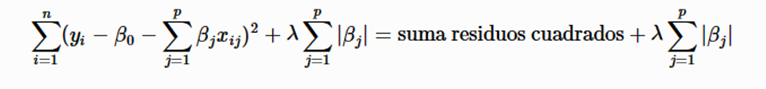

## Comparación Ridge y Lasso


La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos.

Por otro lado, cuando existen predictores altamente correlacionados (linealmente), ridge reduce la influencia de todos ellos a la vez y de forma proporcional, mientras que lasso tiende a seleccionar uno de ellos, dándole todo el peso y excluyendo al resto. En presencia de correlaciones, esta selección varía mucho con pequeñas perturbaciones (cambios en los datos de entrenamiento), por lo que, las soluciones de lasso, son muy inestables si los predictores están altamente correlacionados.

Para conseguir un equilibrio óptimo entre estas dos propiedades, se puede emplear lo que se conoce como penalización elastic net, que combina ambas estrategias.

## Elastic net

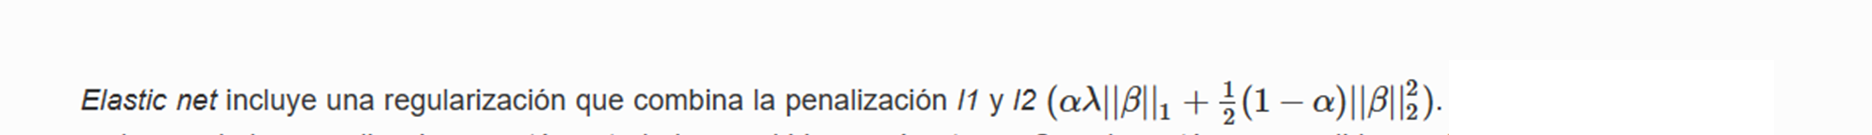

 . El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro  α
 . Su valor está comprendido en el intervalo [0,1]. Cuando  α=0
 , se aplica ridge y cuando  α=1
  se aplica lasso. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización l1 ( α
  muy próximo a 1) para conseguir seleccionar predictores y un poco a la l2 para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados.
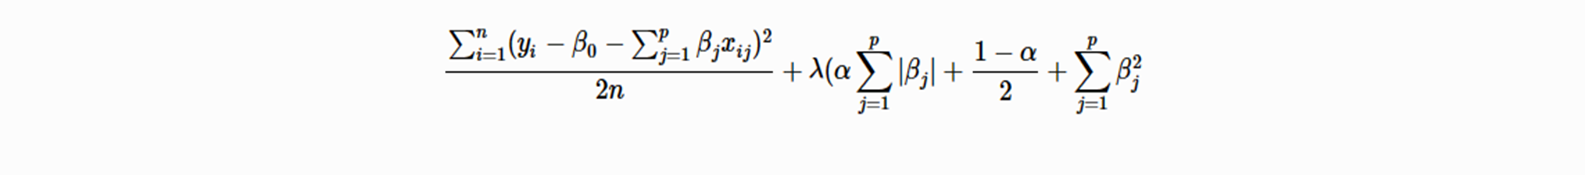


## Lambda Search


Encontrar el mejor modelo implica identificar el valor óptimo del hiperparámetro de regularización lambda ( λ
 ). Al tratarse de un hiperparámetro, no hay forma de saber de antemano qué valor es el adecuado. Una forma de lograrlo es emplear validación cruzada o generalized cross validation, esta última es una adaptación eficiente de leave-one-out cross validation disponible para la regulación Ridge. Con scikit learn esto puede conseguirse fácilmente de dos formas:

Combinar GridSearchCV y un modelo de tipo Ridge, Lasso o ElasticNet.

Emplear RidgeCV, LassoCV o ElasticNetCV. Son adaptaciones que incorporan validación cruzada. Si no se indica nada en el argumento cv, en RidgeCV, se aplica Generalized Cross-Validation (GCV). Si se le indica un valor entero, se aplica validación cruzada con GridSearchCV. Por ejemplo cv=10 equivale a 10-fold cross-validation, en lugar de Generalized Cross-Validation.

Por lo general, las versiones que incorporan la validación cruzada son más directas y cómodas de utilizar, sin embargo, hay situaciones para las que no son adecuadas. Por ejemplo, si los datos tienen un orden temporal (series temporales), la validación cruzada debe hacer un reparto ordenado de las observaciones, lo que se consigue combinando sklearn.model_selection.TimeSeriesSplit con GridSearchCV. Para más información sobre cómo utilizar GridSearchCV consultar machine learning con scikit learn.

Se emplee un método u otro siempre hay que estandarizar o normalizar los predictores.

Aunque el valor óptimo de  λ
  es aquel con el que se minimiza el error de validación cruzada, una práctica extendida es utilizar, en lugar de este, el mayor valor de  λ
  que se aleja menos de una desviación típica del óptimo. De este modo, se consigue un modelo más sencillo (excluye más predictores) pero cuya capacidad predictiva es similar a la conseguida con el modelo más complejo.

**Nota:** scikitlearn utiliza el argumento **alpha** para hacer referencia a **lambda** y el argumento **l1ratio** para referirse a **alpha**.

# Ejemplo regresión

#### Fuente:
- Regularización Ridge, Lasso y Elastic Net con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

### Las librerías utilizadas en este ejemplo son:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Datos

#### El set de datos contiene 101 columnas. Las 100 primeras, nombradas como  V1 , ..., V100 recogen el valor de absorbancia para cada una de las 100 longitudes de onda analizadas (predictores), y la columna fat el contenido en grasa medido por técnicas químicas (variable respuesta).

In [ ]:
# Datos
# ==============================================================================
datos = pd.read_csv('meatspec.csv')
datos = datos.drop(columns = datos.columns[0])
datos.info()

In [ ]:
# NOTA: el siguiente Scrpit no está incluido en este notebook del autor original
df = datos.copy()
df

### Relación entre variables

#### El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

display(tidy_corr_matrix(corr_matrix).head(5))

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(corr_matrix,square= True,ax = ax)

ax.tick_params(labelsize = 3)

#### Muchas de las variables están altamente correlacionadas (correlación absoluta > 0.8), lo que supone un problema a la hora de emplear modelos de regresión lineal.



In [ ]:
# NOTA: el siguiente Scrpit no está incluido en este notebook del autor original
corr = df.corr()
corr.style.background_gradient (cmap = 'coolwarm')

### Modelos

#### 
Se ajustan varios modelos lineales con y sin regularización, con el objetivo de identificar cuál de ellos es capaz de predecir mejor el contenido en grasa de la carne en función de las señales registradas por el espectrofotómetro.

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (70%) y otro de test (30%).


In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns='fat')
y = datos['fat']

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
df.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

### Modelo 1: Mínimos cuadrados (OLS)

In [ ]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression()   # "normalize=True" --> éste parametro introducido genera un error..!
modelo.fit(X = X_train, y = y_train)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()})

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='.')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"--> El error (rmse) de test es: {rmse_ols}")

#### **** Las predicciones del modelo final se alejan en promedio 3.84 unidades del valor real.

### Modelo 2: Ridge

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            #normalize       = True,  # ésta linea genera un error..!
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

#### Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False) # "normalize=True" éste parametro introducido genera un error.!
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(9,6.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

### Gráfica anterior:  Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce.

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2 )

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo')

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd')

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();


In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()})

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

### En comparación al modelo por mínimos cuadrados ordinarios (OLS), con Ridge, el orden de magnitud de los coeficientes es mucho menor.

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")

#### *** Las predicciones del modelo final se alejan en promedio 2.45 unidades del valor real.

### Modelo 3:  Lasso

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            #normalize       = True, # ésta linea genera un error..!
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

#### Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)#"normalize=True" éste parametro introducido genera un error.!
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

####  Fig. anterior: Se puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y más predictores quedan excluidos (su coeficiente es 0).

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False) #"normalize=True" éste parametro introducido genera un error.!
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

In [ ]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

#### Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada:

In [ ]:
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = LassoCV()
modelo.fit(X_train, y_train)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

#### De los 100 predictores disponibles, el modelo final solo incluye 24.

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');


In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")

#### Calculo anterior: Las predicciones del modelo final se alejan en promedio 4.52 unidades del valor real, utilizando solo 22 de los 100 predictores disponibles.

## Modelo 4: Elastic net

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            #normalize       = True,    # ésta linea genera un error..!
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [ ]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"] )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()})
df_coeficientes

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
predicciones.flatten()

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")

#### Las predicciones del modelo final se alejan en promedio 5.23 unidades del valor real, utilizando solo 22 de los 100 predictores disponibles.

## Comparación

### Se compara el error de test (rmse) de los 4 modelos

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### Comentarios fianles: En este caso el mejor modelo se obtiene aplicando regularización Ridge. El modelo con regularización Lasso tiene un error ligeramente superior al modelo OLS pero emplea solo 24 predictores en lugar de 100. La regularización Elastic-net empeora el modelo.

##### ***-----------------------------------------------------------------------------------------------***

## Información de sesión¶


In [ ]:
from sinfo import sinfo
sinfo()